# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [77]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [78]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [79]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [80]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [81]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [82]:
from keras.models import Sequential
from keras.layers import Dense

In [83]:
#建立模型
from keras.models import Sequential
from keras.layers import Dense

#宣告採用序列模型
model = Sequential()

#建構輸入層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

model.add(Dense(units=256, 
                kernel_initializer='normal', 
                activation='relu'))

model.add(Dense(units=256, 
                kernel_initializer='normal', 
                activation='relu'))

model.add(Dense(units=256, 
                kernel_initializer='normal', 
                activation='relu'))

model.add(Dense(units=256, 
                kernel_initializer='normal', 
                activation='relu'))

model.add(Dense(units=128, 
                kernel_initializer='normal', 
                activation='relu'))

#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_22 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_23 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_24 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_25 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_26 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_27 (Dense)             (None, 10)               

# 訓練模型

In [84]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [85]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 23s 487us/step - loss: 0.2916 - accuracy: 0.9136 - val_loss: 0.1356 - val_accuracy: 0.9621
Epoch 2/10
48000/48000 [==============================] - 23s 480us/step - loss: 0.1325 - accuracy: 0.9641 - val_loss: 0.1173 - val_accuracy: 0.9682
Epoch 3/10
48000/48000 [==============================] - 29s 603us/step - loss: 0.0963 - accuracy: 0.9737 - val_loss: 0.1635 - val_accuracy: 0.9567
Epoch 4/10
48000/48000 [==============================] - 24s 498us/step - loss: 0.0776 - accuracy: 0.9785 - val_loss: 0.1219 - val_accuracy: 0.9678
Epoch 5/10
48000/48000 [==============================] - 26s 534us/step - loss: 0.0654 - accuracy: 0.9823 - val_loss: 0.1204 - val_accuracy: 0.9722
Epoch 6/10
48000/48000 [==============================] - 22s 467us/step - loss: 0.0575 - accuracy: 0.9847 - val_loss: 0.1392 - val_accuracy: 0.9693
Epoch 7/10
48000/48000 [==============================] 

# 以圖形顯示訓練過程

In [86]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

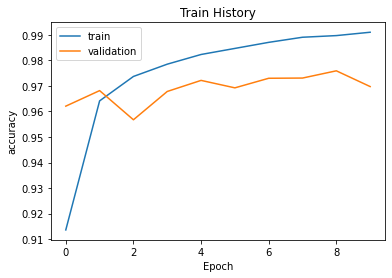

In [87]:
show_train_history(train_history,'accuracy','val_accuracy')

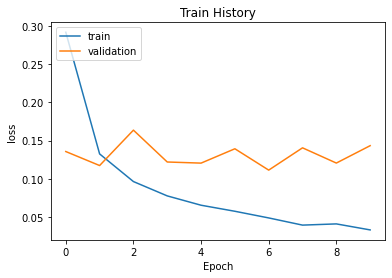

In [88]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [89]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 124us/step

accuracy= 0.9689000248908997


一層hidden:acc= 0.9772999882698059  
二層hidden:acc= 0.9779999852180481  
三層hidden:acc= 0.9789000153541565  
四層hidden:acc= 0.9794999957084656  
五層hidden:acc= 0.9764999747276306  
六層hidden:acc= 0.9689000248908997